<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_ANN_r_squared_AM_7_set_9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[2] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     169  109.969704  109.459793  ...   93.244423   77.996979   49.732361
1     116   58.872768   58.652790  ...    9.456599    9.206897    9.206896
2     133  114.110802  118.559540  ...  156.833786  159.986160  161.797775
3     102   80.742798   81.458672  ...  116.524811  119.746262  121.302582
4     106  185.266281  164.430405  ...  132.368103  146.658234  150.278748
5     168   52.222221   49.166668  ...    8.416667    8.194445    7.694445
6     147  171.086182  173.802719  ...  114.192749  115.963715  116.544220
7     199   85.277115   97.118523  ...    7.067952    6.918033    7.070048
8     102  113.290665  113.755875  ...   57.334488   55.519032   65.638222
9     178  104.911880   86.208191  ...   25.681231   25.160967   24.251488
10    185   78.093994  106.497551  ...    7.283944    7.288035    7.425478
11    149  138.389435  142.935287  ...  183.049744  188.746597  202.389938
12    153  107.958176  10

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'ANN without convolution '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 1s 23ms/step - loss: 0.6922 - accuracy: 0.4956 - val_loss: 0.6897 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5656 - val_loss: 0.6855 - val_accuracy: 0.5578
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.6239 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.6501 - val_loss: 0.6742 - val_accuracy: 0.7551
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6739 - accuracy: 0.6181 - val_loss: 0.6671 - val_accuracy: 0.5986
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.6472 - val_loss: 0.6575 - val_accuracy: 0.7279
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6588 - accuracy: 0.6764 - val_loss: 0.6467 - val_accuracy: 0.7415
Epoch 8/200


In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         2  73


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[2] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction = np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   172.0  122.342361  131.372101  ...  181.855057  174.899963  159.308807
3   193.0    0.187173    0.315928  ...    7.384923    7.383420    7.619452
4   103.0  136.503815  136.014984  ...  146.499466  146.234589  145.218506
5   169.0  176.904602  140.640839  ...  107.533974  119.726982  123.530304
6   107.0  117.685814  115.097305  ...   93.725044   84.245613   83.938332
11  143.0  106.582817  106.743027  ...    7.670546    8.964106    9.373025
13  172.0  111.638733  121.967018  ...  114.441879  132.679291  148.480804
14  178.0  141.126892  139.171570  ...  145.532394  144.001404  144.023376
16  130.0   76.077156   64.618698  ...    7.052072    6.813965    5.904142
17  128.0   83.059570   84.755859  ...   59.548828   59.777344   58.798828
19  171.0  135.176193  135.834915  ...   48.182175   73.298073  150.721497
20  151.0  140.393005  140.727829  ...  142.171494  138.417084  137.861679
21  174.0   54.430443   5

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra7.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  1.387
1           2  1.626
2           3  1.336


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,172.0,122.342361,131.372101,136.660919,144.073563,149.807465,151.860489,145.995682,106.234184,94.091949,113.922119,131.554916,148.676025,139.879929,133.356949,134.662537,136.847488,139.089233,141.762039,145.752319,146.690643,146.462418,149.498657,160.185516,167.687958,170.252029,156.316391,127.671181,133.031906,127.620346,137.196320,142.368851,146.205521,149.325058,156.938354,159.116287,142.534348,100.740417,104.626289,130.247711,...,150.446747,159.209854,170.239044,175.322876,187.562469,222.344513,241.067078,214.168198,122.147110,177.523529,175.289337,159.424561,107.959442,106.232567,107.758789,109.964851,116.596008,122.231476,118.822067,127.941605,144.603043,148.285034,148.018387,147.432129,143.030838,141.791245,145.036240,149.763657,156.056793,165.065430,173.572723,180.565720,193.873993,211.666321,220.799377,161.280701,164.837219,181.855057,174.899963,159.308807
3,193.0,0.187173,0.315928,1.368574,5.062418,19.398935,47.040810,57.377460,61.014061,61.132332,54.725285,51.970421,60.586269,79.272705,90.152512,88.259605,90.744713,96.050575,95.988144,99.139999,104.026840,107.994423,109.543999,114.772453,126.287445,132.694153,134.745850,136.346069,137.946320,0.031303,0.889742,2.674917,10.215737,47.689739,60.540340,60.817230,60.328953,59.628716,60.256493,59.398857,...,0.196703,0.160622,0.160622,0.160622,0.218502,0.305699,0.273376,0.160622,0.160622,0.160622,0.247067,0.153856,1.873473,3.928616,5.589868,6.412978,6.680582,6.948187,6.606164,6.367124,7.475126,6.986523,7.465354,7.904346,6.359607,7.484146,6.889554,7.512711,7.405219,7.483396,7.051168,7.025611,7.112057,7.378157,7.456334,7.539021,8.142634,7.384923,7.383420,7.619452
4,103.0,136.503815,136.014984,137.558395,137.970673,137.405029,136.197372,132.837860,130.777176,128.084366,124.624458,121.255440,118.718918,118.570267,117.470261,117.934006,133.528137,155.634644,165.175613,174.994720,183.153641,198.477509,210.075974,210.265442,204.302948,189.311050,174.088715,172.682724,166.701187,137.200012,138.064743,138.217819,136.863693,132.885666,129.117157,128.252518,129.478073,129.036560,129.001694,128.416733,...,141.593552,145.755112,148.531906,150.790359,151.573944,152.347824,151.904510,152.018753,151.183426,149.213013,147.640198,146.999985,136.685638,139.880661,142.932327,143.698273,144.661224,144.460449,146.399750,145.152313,144.026215,141.533783,136.277115,125.651993,119.938721,124.511261,133.245926,137.646515,140.828735,144.398712,146.221985,147.492218,151.092651,154.088043,153.319153,151.667740,148.937027,146.499466,146.234589,145.218506
5,169.0,176.904602,140.640839,90.492897,97.753578,94.019646,95.961456,95.330620,98.520500,111.518784,127.484673,129.039032,121.322144,115.568314,116.047707,117.803741,119.396835,120.422523,121.499313,122.282234,124.249107,131.210800,138.110489,142.113983,136.225067,104.057457,73.525536,81.672241,79.988342,174.585236,143.386948,88.112877,99.591179,93.912216,94.001854,97.013832,101.976746,111.872620,128.615097,128.626450,...,85.670914,88.744255,90.948555,96.483521,101.251198,119.908600,126.819717,78.798775,80.414055,111.309753,117.326660,119.492058,74.615517,75.480270,75.288284,73.889038,73.013329,73.504005,75.715759,80.493263,88.078773,96.907379,103.866287,102.185242,92.670250,92.037071,91.617165,89.805672,87.194740,89.097397,91.692719,94.274704,101.874855,111.894897,100.873985,43.068096,57.029865,107.533974,119.726982,123.530304
6,107.0,117.685814,115.097305,115.542229,116.424057,116.181061,118.522926,120.260727,119.271988,119.773430,118.531219,116.529388,115.463440,114.264130,113.208664,113.036942,113.429642,122.168312,137.576126,147.252594,153.990997,161.954834,167.461517,171.678848,170.407288,166.591766,148.880341,130.270599,130.354095,115.234787,113.721634,113.246475,114.842

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

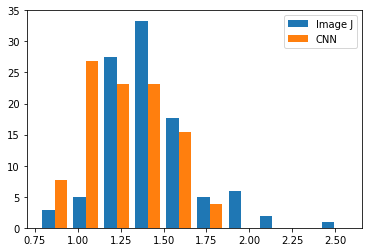

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.02941176, 0.07843137, 0.35294118, 0.68627451, 0.8627451 ,
         0.91176471, 0.97058824, 0.99019608, 0.99019608, 1.        ],
        [0.07692308, 0.34615385, 0.57692308, 0.80769231, 0.96153846,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.77401142, 0.95510518, 1.13619893, 1.31729269, 1.49838644,
        1.67948019, 1.86057395, 2.0416677 , 2.22276145, 2.40385521,
        2.58494896]),
 <a list of 2 Lists of Patches objects>)

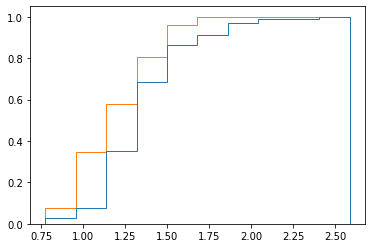

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.8840628011552635


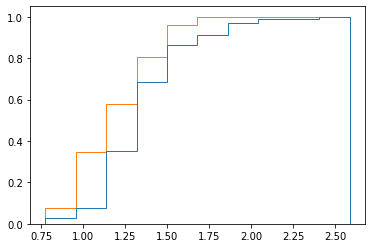

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
#df

In [32]:
# r.history['accuracy']

In [33]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [34]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a list of 2 Lists of Patches objects>
[0.77401142 0.95510518 1.13619893 1.31729269 1.49838644 1.67948019
 1.86057395 2.0416677  2.22276145 2.40385521 2.58494896]
[[ 2.94117647  4.90196078 27.45098039 33.33333333 17.64705882  4.90196078
   5.88235294  1.96078431  0.          0.98039216]
 [ 7.69230769 26.92307692 23.07692308 23.07692308 15.38461538  3.84615385
   0.          0.          0.          0.        ]]


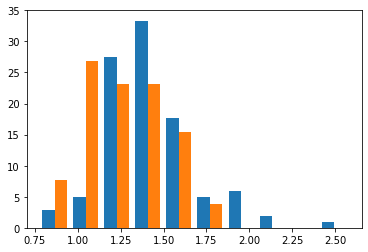

In [35]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [36]:
print(counts.sum())

199.99999999999994


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


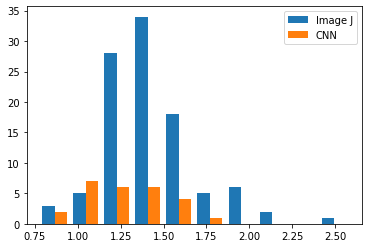

In [37]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [38]:
[Diam1,Diameter_All]

[[1.3289030245084366,
  1.4388493665910183,
  1.3042423209535017,
  0.9027033336764101,
  1.6778356991700483,
  1.1941642642883694,
  1.113613629842976,
  1.254988970803089,
  1.2815923738491737,
  2.186553107171316,
  1.8807071689325485,
  1.2645903954195463,
  1.3284238815238665,
  1.2875394701698204,
  1.1677497815933682,
  1.3805939296073044,
  1.3902437300372827,
  1.2585348599266302,
  1.3966398900698307,
  1.2988619621707653,
  1.3907015741893414,
  1.5533154661153457,
  1.2463355264843006,
  1.2570164179581493,
  1.2870449283923413,
  1.3488733481786004,
  0.9215480325725586,
  1.6572198701420842,
  1.157345238492556,
  1.6281537802488464,
  1.3897857350553149,
  1.2771138777750963,
  0.9991095050455518,
  1.165567069812981,
  1.875962180228586,
  1.2437789380968078,
  1.0957485526731296,
  1.6667959343039342,
  1.3755122549350303,
  1.413404699896484,
  1.8427506249649406,
  0.9501193805081709,
  1.1317592420667806,
  1.4272992929222168,
  1.3389254195014408,
  2.0058506827187